# Prerequisitos con Matplotlib - Parte 2

En las lecciones anteriores utilizamos visualizaciones de una sola variable, pero en este apartado veremos gráficas con respecto a multivariables para tener más vistazos de la información.  La idea de ver una contra otra variable es tratar de discernir sobre su comportamiento, si una afecta a la otra o si existen patrones entre ellas o si son grupos de datos donde tienen comportamiento sobre otra variable.

Veremos estos tipos de gráficos:
- Scatterplots
  - cuantitativo vs cuantitativo
- Violin
  - cuantitativo vs cualitativo
- Clustered bar chart
  - cualitativo vs cualitativo.
  
Si nos interesa saber relaciones entre dos variables el gráfico scatter es el que debemos utilizar

<img src="imgs/scatterplot.PNG" width="30%" />

La gráfica nos muestra que relación existe en la gráfica con respecto a sus características (variables dependiente e independiente).

La manera de saber que tan relacionada está una variable contra otra se da con respecto al coeficiente de correlación, el más común es el coeficiente de Pearson (r).  Esta relación es positiva y cercana a 1 si la pendiente o la relación es ascendente o si la relación es descendente el coeficiente es -1 y tiende a decir que mientras que una variable aumenta la otra también aumenta.  Los valores cercanos a 0 nos dan una baja correlación de datos.  Ahora, el coeficioente r calcula la relación lineal solamente.

Lo que a veces nos conviene como vimos en el apartado anterior es tener un gráfico logaritmico, esto quizá convierta la relación en una lineal a la hora del análisis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel = pd.read_csv('data/fuel_consumption.csv')
print(fuel.shape)
fuel.head()

(1046, 12)


,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


Veamos ahora la relación entre los cilindros y tamaño de máquina.

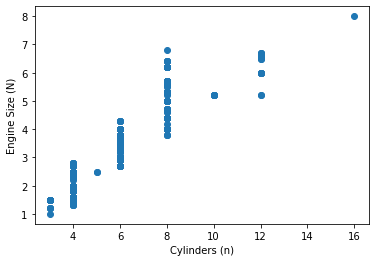

In [4]:
plt.scatter(data=fuel, x='Cylinders', y='Engine-Size')
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

En seaborn tenemos algo similar pero con una linea de tendencia

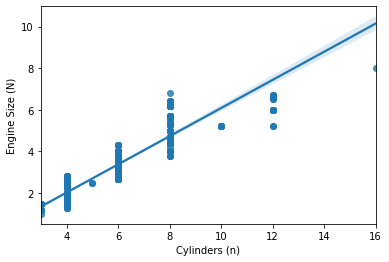

In [5]:
sb.regplot(data=fuel, x='Cylinders', y='Engine-Size') # para quitar la línea utilizar el argumento fit_reg=False
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

### Overplot, Transparencia y jitter

A veces estos gráficos 2D no son lo suficientemente buenos para analizar la data y ver su distribución.  Para esto es mejor hacer un gráfico de otro estilo para ver la data

Se puede hacer este tipo de gráfico utilizando los métodos de *sampling*, *transparencia* y *jitter*.  ¿Puede ud. decir cual es la tendencia de la gráfica inferior si no tuviera transparencia?

<img src="imgs/scatterplot1.PNG" width="30%" />

Para el método de sampling elegimos un grupo de puntos a graficar, no todos.

También podemos utilizar transparencia para ver donde se agrupan la mayor cantidad de datos.

Si las variables son mas del tipo discreto, como las gráficas anteriores esta gráfica debe ser ayudada por el método de jitter, lo que hace esto es añadir algo de ruido a la data para que se mueva un poco y verla distribuida sobre el área de incidencia.  

Veamos ahora la relación entre los datos anteriores con este método.

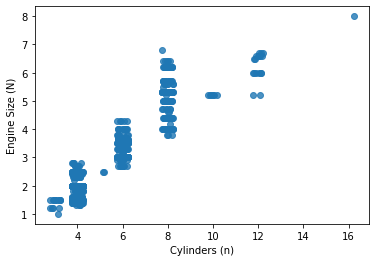

In [6]:
sb.regplot(data=fuel, x='Cylinders', y='Engine-Size', fit_reg=False, x_jitter=0.25)
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

De la gráfica anterior vemos que los gráficos se han separado un poco pero todavia no nos son fáciles de visualizar, debemos añadir transparencia.

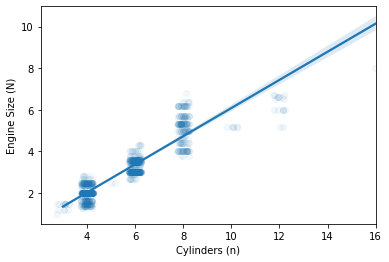

In [7]:
sb.regplot(data=fuel, x='Cylinders', y='Engine-Size', x_jitter=0.25, scatter_kws={'alpha':0.05}) 
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

#### Mapas de Calor

Cuando vemos la información de relación de color y densidad de datos para la gráfica anterior quizá una mejor manera de representar estos datos es por medio de mapas de calor.

<img src="imgs/heatmap.PNG" width="40%" />

Como vemos la zona se divide en pequeñas porciones y todos los datos que caigan en esta zona son contabilizados, luego una escala transmite que tan frecuente son estos datos en base a esta zona.  Un mapa de calor es la versión 2D de un barplot pero de vista de pájaro.  

Los datos son marcados en color, sin embargo, una mejor medida visual es establecer los números de cuenta sobre estos cuadros.

Un heatmap se prefiere cuando por ejemplo se requiere asociar variables discretas y es una buena alternativa a transparencia de los datos y cuando se tiene muchos datos, finalmente ha que tener cuidado con el tamaño de los bins (recipientes) si se elije muy grande el bin podemos perdernos en la data y si es muy pequeño podemos perdernos con el ruido.

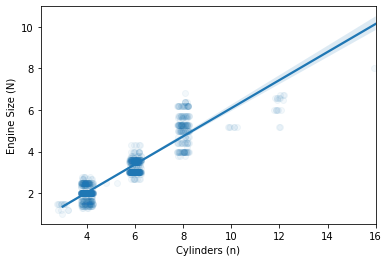

In [8]:
# Tenemos la grafica anterior
sb.regplot(data=fuel, x='Cylinders', y='Engine-Size', x_jitter=0.25, scatter_kws={'alpha':0.05}) 
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

# Veamos ahora como se graficarán mapas de calor

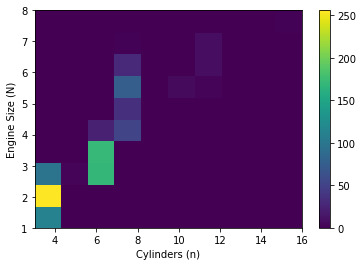

In [9]:
plt.hist2d(data=fuel, x='Cylinders', y='Engine-Size') 
plt.colorbar()
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

Cambiemos ahora un poco los parámetros para mejorar la presentación del gráfico

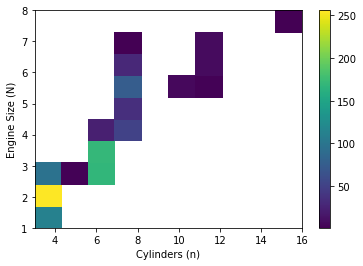

In [10]:
plt.hist2d(data=fuel, x='Cylinders', y='Engine-Size', cmin=0.5) 
plt.colorbar()
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

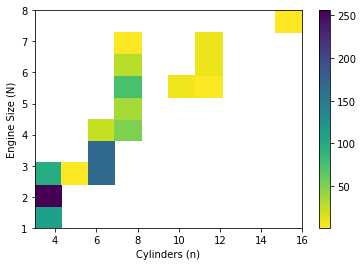

In [11]:
plt.hist2d(data=fuel, x='Cylinders', y='Engine-Size', cmin=0.5, cmap='viridis_r') 
plt.colorbar()
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

Veamos como cambiar los tamaños de los bins a algo más proporcional.  Tomando los máximos y mínimos

In [157]:
describe = fuel[['Engine-Size','CO2-Emissions']]
print(describe.min())
print()
print(describe.max())

Engine-Size       1.0
CO2-Emissions    96.0
dtype: float64

Engine-Size        8.0
CO2-Emissions    522.0
dtype: float64


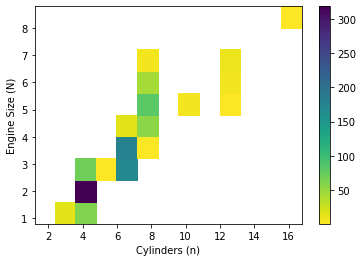

In [113]:
binx=np.arange(1.2, 16+1.5, 1.2)
biny=np.arange(0.8, 8+1.5, 0.8)
plt.hist2d(data=fuel, x='Cylinders', y='Engine-Size', cmin=0.5, cmap='viridis_r', bins=[binx,biny]) 
plt.colorbar()
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');

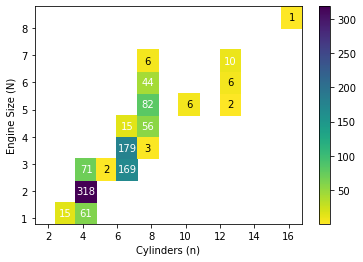

In [14]:
# hist2d también es una funcion, esta retorna diferentes valores, p.e. la cantidad de cuenta de puntos
binx=np.arange(1.2, 16+1.5, 1.2)
biny=np.arange(0.8, 8+1.5, 0.8)
hgm = plt.hist2d(data=fuel, x='Cylinders', y='Engine-Size', cmin=0.5, cmap='viridis_r', bins=[binx,biny]) 
plt.colorbar()
plt.xlabel('Cylinders (n)')
plt.ylabel('Engine Size (N)');
cnts = hgm[0]
# Vamos a poner estos números sobre el mapa de calor
for i in range(cnts.shape[0]):
    for j in range(cnts.shape[1]):
        c = cnts[i,j]
        if c >= 7: # aumenta la visibilidad de celdas oscuras
            plt.text(binx[i]+.6, biny[j]+0.4, int(c), ha='center', va='center', color='white')
        elif c > 0:
            plt.text(binx[i]+.6, biny[j]+0.4, int(c), ha='center', va='center', color='black')

#### Graficos de violín

Como vimos anterioremente jitter y transparencia ayudan a entender la data discreta mejor.  Los gráficos de violín nos ayudan a entender mejor la informacion cualitativa vs cuantitativa.
<img src="imgs/violinplot.PNG" />

In [15]:
fuel.head(1)

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199


Veamos ahora la relación entre el tipo de transmisión vs Consumo en ciudad utilizando gráficos de violín

In [16]:
txclass = fuel['Transmission'].value_counts().index
vcls  =pd.api.types.CategoricalDtype(ordered=True, categories=txclass)
fuelcp = fuel['Transmission'].copy()
fuelcp = fuelcp.astype(vcls)

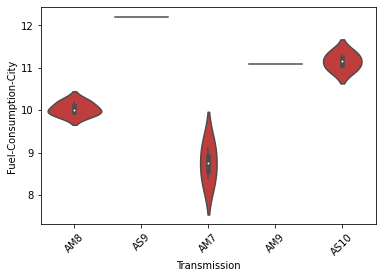

In [17]:
sb.violinplot(data=fuel[:10], x='Transmission', y='Fuel-Consumption-City', color=sb.color_palette()[3]) # probar inner=None
plt.xticks(rotation=45);

#### Gráficos de caja

Los gráficos de violin nos sirven para datos cuantitativos y cualitativos, lo siguiente es un box plot, podemos ver estadisticas entre cada gráfico.

<img src="imgs/boxplot.PNG" />

Una manera de analizar podría ser empezando por gráficos de violín y hacer las mediciones de media, máximo y mínimo, pero es aqui donde los gráficos de caja simplifican el trabajo y es mejor, para estadísticas, utilizar los graficos de caja.

Veamos ahora la misma gráfica de los datos pero ahora desde la perspectiva de gráficos de caja.

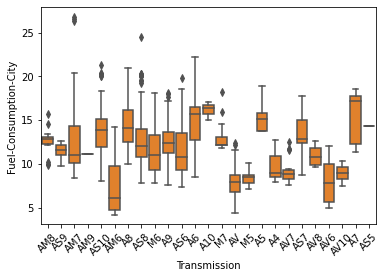

In [18]:
sb.boxplot(data=fuel, x='Transmission', y='Fuel-Consumption-City', color=sb.color_palette()[1])
plt.xticks(rotation=45);

Ahora se entiende mejor el gráfico de violín, si observamos el gráfico de violín el valor medio esta dado por la región blanca  los otros datos son los cuartos. Veamos la misma gráfica de violín pero con el parámetro de cuartos.

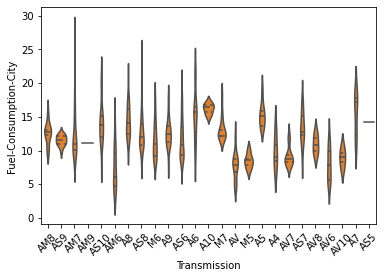

In [19]:
sb.violinplot(data=fuel, x='Transmission', y='Fuel-Consumption-City', color=sb.color_palette()[1], inner='quartile')
plt.xticks(rotation=45);

#### Gráficos de Barra Agrupados

Si quisieramos ver la relación de dos variables categóricas entonces tendríamos que ir más allá de las gráficas relacionadas anteriormente.

Un gráfico de barras agrupadas permite ver la frecuencia en el eje y y las caracterísitcas en el eje X, también podemos distinguir por medio de leyendas más de un solo dato.

Normalmente este gráfico se acompaña de un mapa de calor al lado del gráfico de código de barras para visualizar la relación de estas variables.  Veamos la relación de dos variables categóricas, clase de vehículo y transmisión.

In [20]:
fuelcp = fuel[['Fuel-Type', 'Vehicle-Class']].copy()
fuelcp.head(1)

,Fuel-Type,Vehicle-Class
0,Z,Compact


In [21]:
fuelcnts = fuelcp.groupby(['Fuel-Type', 'Vehicle-Class']).size()
fuelcnts.head()

Fuel-Type  Vehicle-Class         
D          Compact                   2
           Mid-size                  2
           Pickup truck: Small       5
           Pickup truck: Standard    7
           SUV: Small                7
dtype: int64

In [22]:
fuelcnts = fuelcnts.reset_index(name='count')
fuelcnts.head()

,Fuel-Type,Vehicle-Class,count
0,D,Compact,2
1,D,Mid-size,2
2,D,Pickup truck: Small,5
3,D,Pickup truck: Standard,7
4,D,SUV: Small,7


In [23]:
fuelcnts = fuelcnts.pivot(index='Fuel-Type', columns='Vehicle-Class', values='count')
fuelcnts.head()

Vehicle-Class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater,Van: Passenger
Fuel-Type,,,,,,,,,,,,,,,
D,2.0,NaN,2.0,NaN,NaN,5.0,7.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,8.0,NaN,NaN,1.0,NaN,16.0,2.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN
X,48.0,46.0,73.0,2.0,8.0,20.0,73.0,117.0,48.0,9.0,2.0,24.0,22.0,3.0,2.0
Z,54.0,47.0,67.0,54.0,NaN,NaN,3.0,46.0,50.0,3.0,7.0,13.0,74.0,66.0,NaN


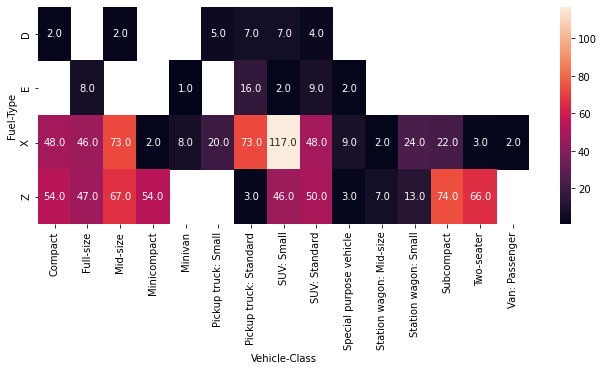

In [24]:
plt.figure(figsize=[11,4])
sb.heatmap(fuelcnts, annot=True, fmt='.1f');

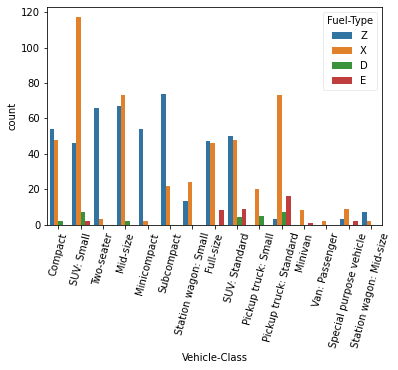

In [25]:
ax = sb.countplot(data=fuelcp, x='Vehicle-Class', hue='Fuel-Type')
ax.legend(loc = 1, ncol = 1, framealpha = 0.4, title='Fuel-Type')
plt.xticks(rotation = 75);

#### Faceting

Las gráficas anteriores podemos pesar que eran gráficas de barra una al lado de otra.  Ahora podemos hacer las mismas gráficas multiples entre ellas debido a que comparten partes similares.

Si tenemos datos categóricos evaluados en la misma columna (y) pero en diferentes niveles entonces podemos utilizar este tipo de gráfico.

<img src="imgs/faceting.PNG" />

Las gráficas pueden ser más de una línea, pueden ser multifila y multicolumnas o ambas.

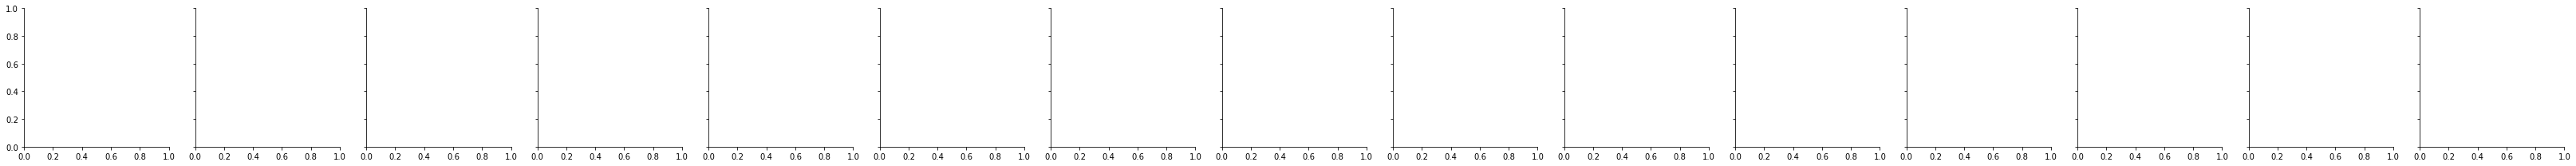

In [26]:
g = sb.FacetGrid(data=fuelcp, col='Vehicle-Class')

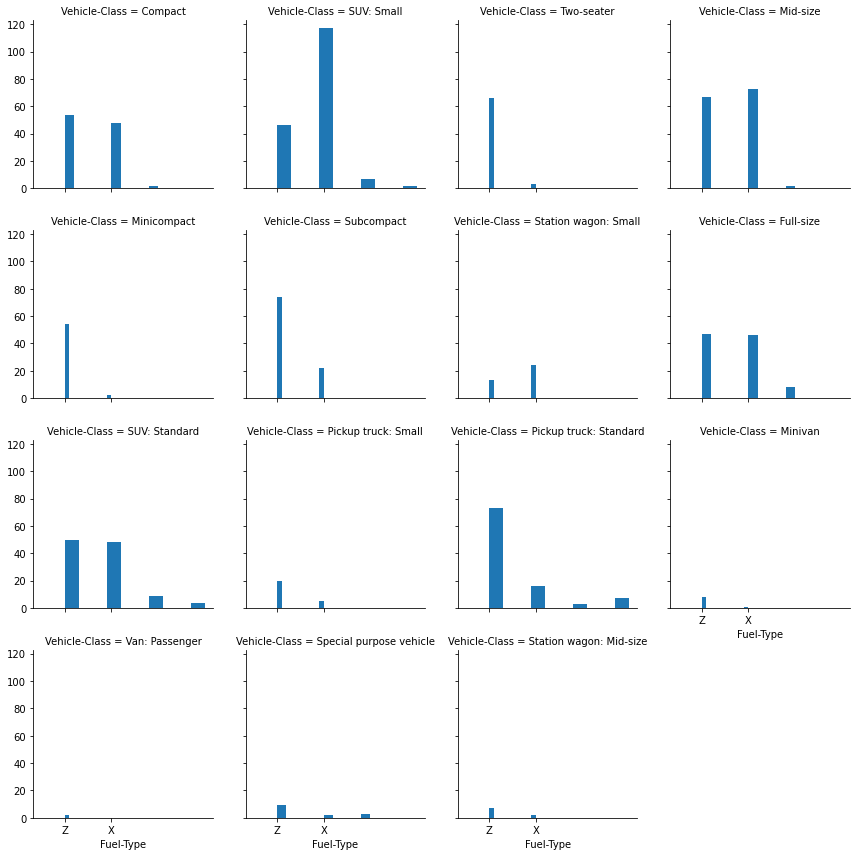

In [27]:
g = sb.FacetGrid(data=fuelcp, col='Vehicle-Class', col_wrap=4)
g.map(plt.hist, 'Fuel-Type');

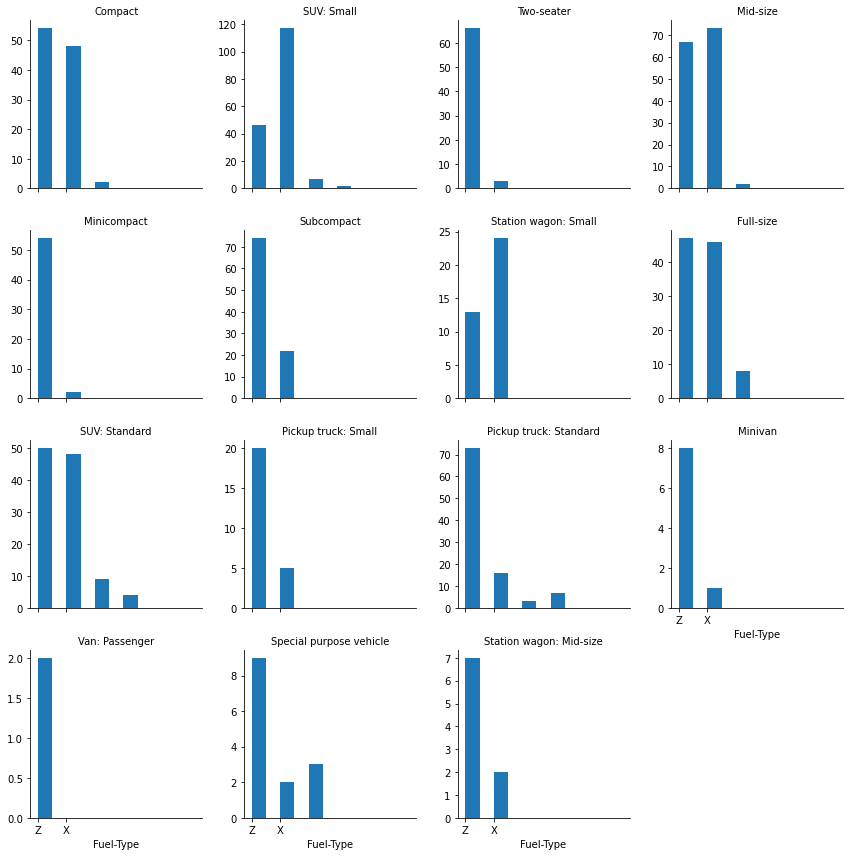

In [28]:
bins = np.arange(0, 6, 0.5)
g = sb.FacetGrid(data=fuelcp, col='Vehicle-Class', col_wrap=4, sharey=False)
g.map(plt.hist, 'Fuel-Type', bins=bins)
g.set_titles('{col_name}');

Other example

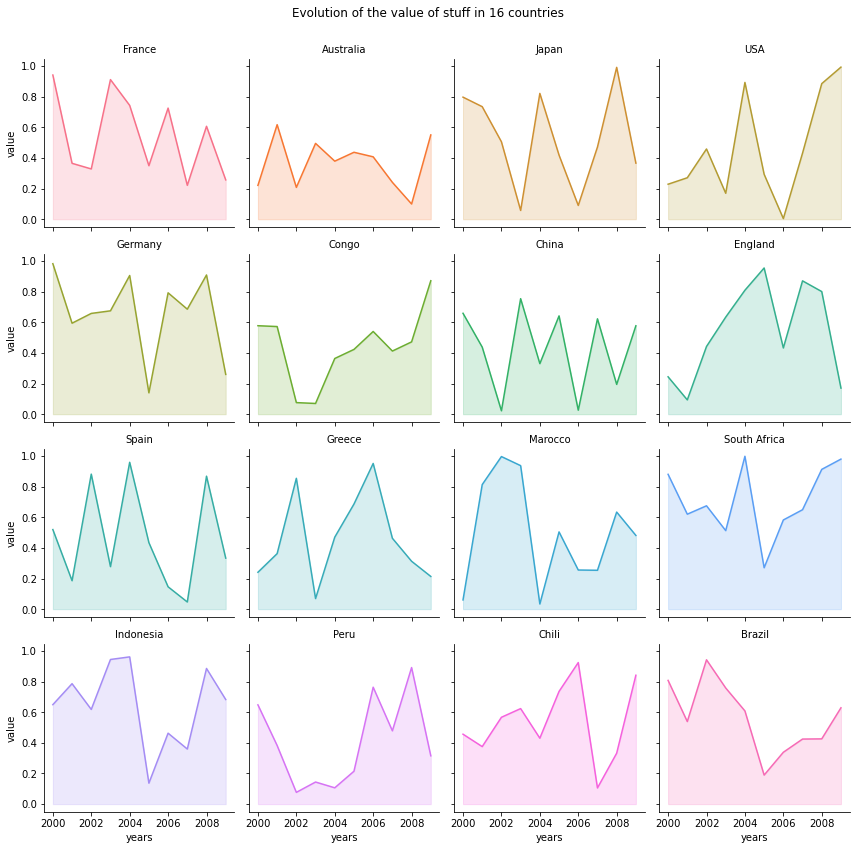

In [29]:
# Create a dataset
my_count=["France","Australia","Japan","USA","Germany","Congo","China","England","Spain","Greece","Marocco","South Africa","Indonesia","Peru","Chili","Brazil"]
df = pd.DataFrame({
"country":np.repeat(my_count, 10),
"years":list(range(2000, 2010)) * 16,
"value":np.random.rand(160)
})
 
# Create a grid : initialize it
g = sb.FacetGrid(df, col='country', hue='country', col_wrap=4, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'years', 'value')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'years', 'value', alpha=0.2).set_titles("{col_name} country")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')
 
plt.show()

#### Adaptación de graficos univariantes

Existe otra manera de utilizar graficos de una variable.  Se puede añadir estadistica visual al estilo de boxplots por medio de los gráficos de línea, son como los gráficos que vimos anteriormente bajo ciertas modificaciones básicas.

Veamos el gráfico con respecto a los valores de combustible.

In [30]:
fuel.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


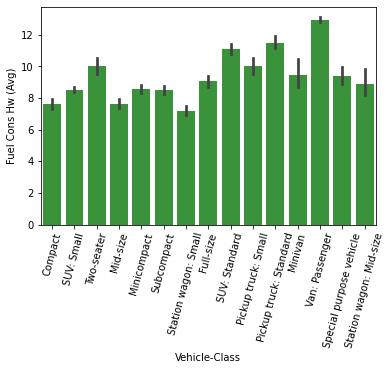

In [31]:
fuelcp = fuel[['Vehicle-Class', 'Fuel-Consumption-Hwy']].copy()
color = sb.color_palette()[2]
sb.barplot(data=fuelcp, x='Vehicle-Class', y='Fuel-Consumption-Hwy', color=color)
plt.ylabel('Fuel Cons Hw (Avg)')
plt.xticks(rotation=75);

Los valores negros son incertidumbres en la media, y el calculo del eje *y* ya observamos que tiene que ver con el calculo de la media de los datos

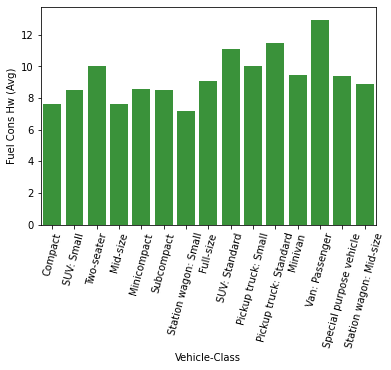

In [32]:
sb.barplot(data=fuelcp, x='Vehicle-Class', y='Fuel-Consumption-Hwy', color=color, errwidth=0) # sin visualización de la media
plt.ylabel('Fuel Cons Hw (Avg)')
plt.xticks(rotation=75);

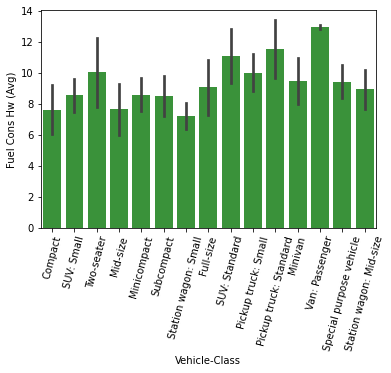

In [33]:
sb.barplot(data=fuelcp, x='Vehicle-Class', y='Fuel-Consumption-Hwy', color=color, ci='sd' ) # representamos la desviación estándar
plt.ylabel('Fuel Cons Hw (Avg)')
plt.xticks(rotation=75);

Si no nos interesan los límites inferiores sino los puntos, podemos hacer lo siguiente para conseguir un gráfico puntual

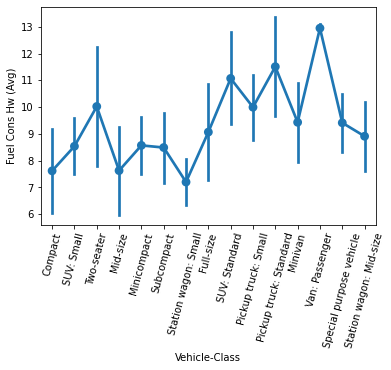

In [34]:
sb.pointplot(data=fuelcp, x='Vehicle-Class', y='Fuel-Consumption-Hwy', ci='sd' ) # representamos la desviación estándar
#sb.pointplot(linestyles="", data=fuelcp, x='Vehicle-Class', y='Fuel-Consumption-Hwy', ci='sd' ) # representamos la desviación estándar
plt.ylabel('Fuel Cons Hw (Avg)')
plt.xticks(rotation=75);

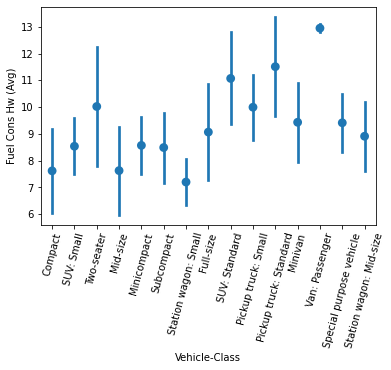

In [35]:
sb.pointplot(linestyles="", data=fuelcp, x='Vehicle-Class', y='Fuel-Consumption-Hwy', ci='sd' ) # representamos la desviación estándar
plt.ylabel('Fuel Cons Hw (Avg)')
plt.xticks(rotation=75);

#### Gráficos de Líneas

Aqui simplemente graficamos los datos uno con respecto a otro pero el eje vertical es la relación de la media. Se parece a un gráfico d barras pero prácticamente une todos los puntos medios del gráfico de barra.  Aquí estamos más interesados son en los cambios relativos de la data.

Estas gráficas de línea se observan bastante en los stock markets y también en cualquier variación de serie de tiempo.

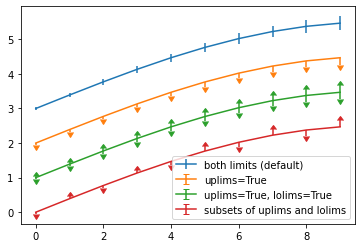

In [36]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

#### Visualización de multivariables

Utilizando colores para tres variables.  Ya vimos los gráficos de violin y cajas, todas estas funciones se pueden realizar con gráficos de más de tres variables. Añadiendo el parámetro de tono.

Veamos algunos ejemplos

In [37]:
np.random.randint(0,10)

0

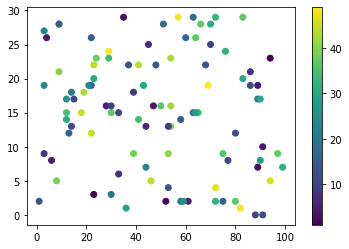

In [38]:
x = [np.random.randint(0, 100) for _ in range(100)]
y = [np.random.randint(0, 30) for _ in range(100)]
z = [np.random.randint(0, 50) for _ in range(100)]
df = pd.DataFrame({'x':x, 'y':y, 'z':z})

plt.scatter(data = df, x =x, y =y, c=z)
plt.colorbar()

Si ud. tiene una variable cualitativa ud puede poner n set de colored diferentes a una variable categorica por medio del tono y facetgrid

#### Intentelo ud.

Haga un gráfico scatter con las siguientes características:
- Etiqueta del eje x: Name
- Etiqueta del eje y: City Consumption
- X-Y scatter plot: Make vs Fuel-Consumption-City
- Rotacion de labels a 90°

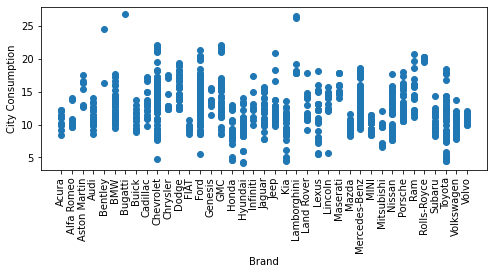

In [51]:
plt.figure(figsize=[8,3])
plt.scatter(data=fuel, x='Make', y='Fuel-Consumption-City')
plt.xticks(rotation=90);
plt.xlabel('Brand')
plt.ylabel('City Consumption');

Respuesta esperada:

<img src="imgs/brand1.PNG" align="left" />

Genere un gráfico regplot con seaborn y las siguientes condicionales:
- Etiqueta del eje x: Year.Period
- Etiqueta del eje y: CO2
- X-Y scatter plot: Model-Year vs CO2-Emissions
- jitter y alpha: 2/5 y 1/10

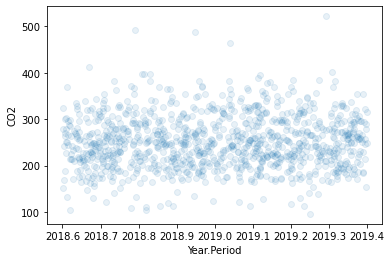

In [65]:
sb.regplot(data=fuel, x='Model-Year', y='CO2-Emissions',x_jitter=2/5, scatter_kws={'alpha':1/10})
plt.xlabel('Year.Period')
plt.ylabel('CO2');

Respuesta esperada:

<img src="imgs/regplot.PNG" align="left" />

Grafique con las siguientes condiciones un mapa de calor y sus respectivas cuentas (conseguir una gráfica aproximada a la inferior):
- Etiqueta del eje x: Engine
- Etiqueta del eje y: Emissions
- X-Y scatter plot: Engine-Size vs CO2-Emissions

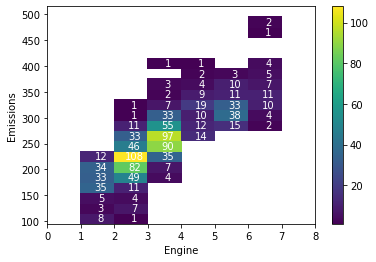

In [184]:
binx=np.arange(0, 9, 1)
biny=np.arange(95,522,20)
hgm = plt.hist2d(data=fuel, x='Engine-Size', y='CO2-Emissions',cmin=0.5,bins=[binx,biny]) 
plt.colorbar()
plt.xlabel('Engine')
plt.ylabel('Emissions')

cnts = hgm[0]

for i in range(cnts.shape[0]):
    for j in range(cnts.shape[1]):
        c = cnts[i,j]
        if c >= 7: # aumenta la visibilidad de celdas oscuras
            plt.text(binx[i]+.6, biny[j]+10, int(c), ha='center', va='center', color='white')
        elif c > 0:
            plt.text(binx[i]+.6, biny[j]+10, int(c), ha='center', va='center', color='white')

Respuesta esperada:

<img src="imgs/heatmap1.PNG" align="left" />

Realizar una gráfica categórica utilizando el dataset de combustible de este notebook
- X, hue = Fuel-Type, Transmission
- posicion ncol de 3
- alpha de 0.4
- Trate de que se parezca a la de la respuesta

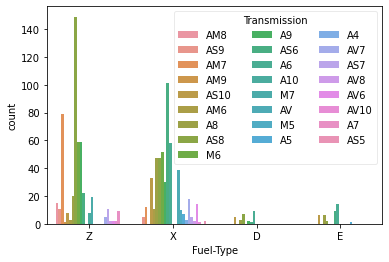

In [192]:
fuelcp = fuel[['Fuel-Type', 'Transmission']].copy()
ax = sb.countplot(data=fuelcp, x='Fuel-Type', hue='Transmission')
ax.legend(loc = 1, ncol = 3, framealpha = 0.4, title='Transmission')

Respuesta Esperada:

<img src="imgs/counterplot.PNG" align="left" />